In [11]:
from globalVariable.global_variable import *
from globalVariable.model import *
import seaborn as sns

vocab_dict =  pickle.load(open(r'globalVariable\token.pk1', 'rb'))
sequences = pickle.load(open(r'globalVariable\sequences.pk1', 'rb'))
vocab_size=len(vocab_dict)

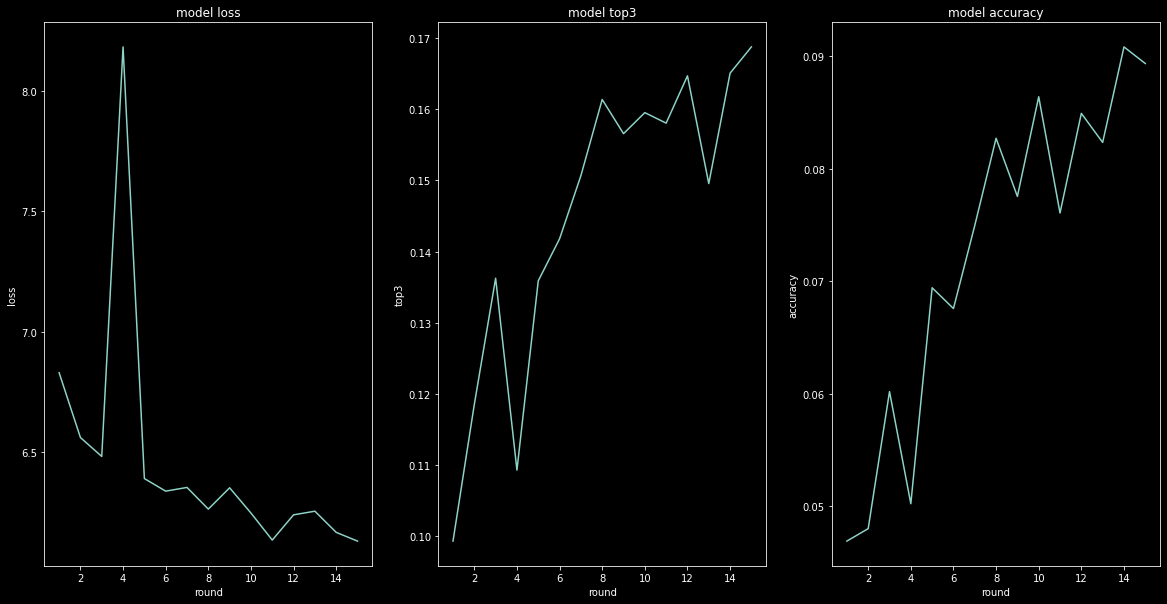

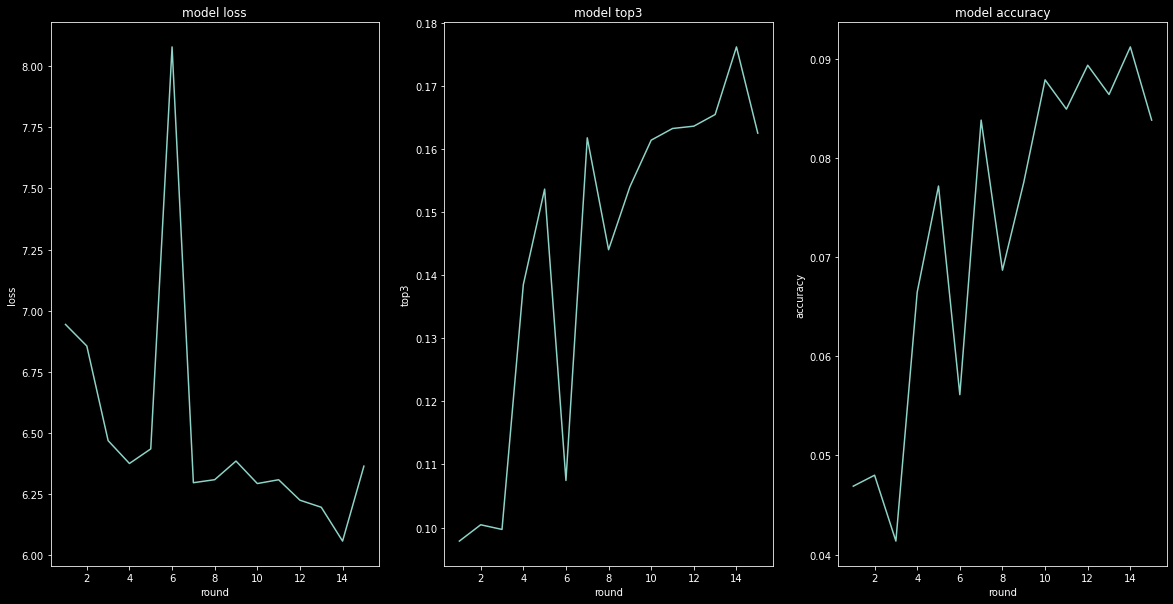

In [12]:
history_fede =  pickle.load(open(r'model\result_poisoned.pk1', 'rb'))

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
ax[0].plot(*zip(*history_fede.losses_distributed))
ax[1].plot(*zip(*history_fede.metrics_distributed['top_k']))
ax[2].plot(*zip(*history_fede.metrics_distributed['accuracy']))
ax[0].set_title('model loss')
ax[1].set_title('model top3')
ax[2].set_title('model accuracy')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('round')
ax[1].set_ylabel('top3')
ax[1].set_xlabel('round')
ax[2].set_ylabel('accuracy')
ax[2].set_xlabel('round')

plt.show()

history_fede =  pickle.load(open(r'model\result_poisoned_explict_boost.pk1', 'rb'))

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
ax[0].plot(*zip(*history_fede.losses_distributed))
ax[1].plot(*zip(*history_fede.metrics_distributed['top_k']))
ax[2].plot(*zip(*history_fede.metrics_distributed['accuracy']))
ax[0].set_title('model loss')
ax[1].set_title('model top3')
ax[2].set_title('model accuracy')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('round')
ax[1].set_ylabel('top3')
ax[1].set_xlabel('round')
ax[2].set_ylabel('accuracy')
ax[2].set_xlabel('round')

plt.show()

In [13]:
model = next_word_model(vocab_size,lengt_sequence)

<AxesSubplot:ylabel='Count'>

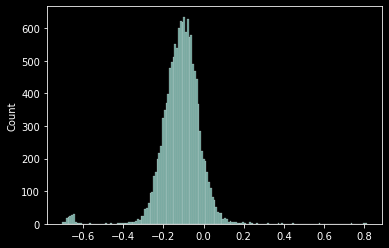

In [14]:
model.load_weights(r"model\centrilized.h5")
weights=model.get_weights()[-1]
sns.histplot(weights)

In [15]:
model.load_weights(r"model\weigth\7.h5")
weights=model.get_weights()[-1]
sns.histplot(weights)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'model\weigth\7.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
from pathlib import Path
def print_results(path):
  avarage=[]
  malicius = None
  plot={}
  for i in range(10):
    try:
      model.load_weights(Path(path+"\\"+str(i+1)+".h5"))
      print(Path(path+"\\"+str(i+1)+".h5"))
      weights=model.get_weights()[-1]
      if (i+1) != 7:
        avarage.append(weights)
      else:
        malicius=weights
      plot[str(i+1)]= weights
    except Exception as e:
      continue
  sns.histplot(plot)
  return {"avarage" :sum(avarage)/len(avarage), "malicius":malicius}

model\weigth\1.h5
model\weigth\2.h5
model\weigth\3.h5
model\weigth\4.h5
model\weigth\5.h5
model\weigth\6.h5
model\weigth\7.h5
model\weigth\8.h5
model\weigth\9.h5
model\weigth\10.h5


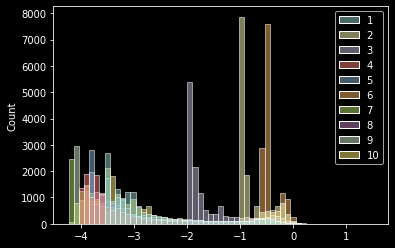

In [ ]:
result=print_results("model\weigth\stealyt")


<AxesSubplot:ylabel='Count'>

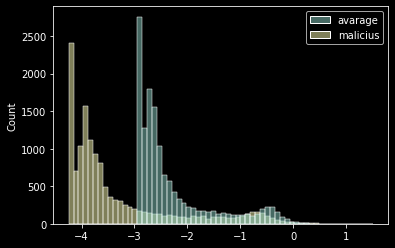

In [ ]:
sns.histplot(result)

model\weigth\explict_boost\1.h5
model\weigth\explict_boost\2.h5
model\weigth\explict_boost\3.h5
model\weigth\explict_boost\4.h5
model\weigth\explict_boost\5.h5
model\weigth\explict_boost\6.h5
model\weigth\explict_boost\7.h5
model\weigth\explict_boost\8.h5
model\weigth\explict_boost\9.h5
model\weigth\explict_boost\10.h5


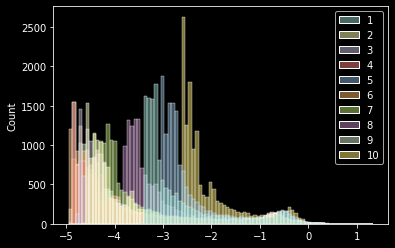

In [ ]:
result2=print_results("model\weigth\explict_boost")


<AxesSubplot:ylabel='Count'>

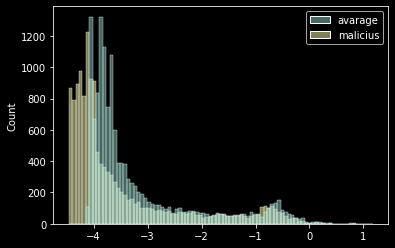

In [ ]:
sns.histplot(result2)